In [2]:
import numpy as np
import pandas as pd

In [17]:
#Load employee reviews
df = pd.read_csv("employee_reviews.csv")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 17 columns):
Unnamed: 0                    67529 non-null int64
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: 

In [18]:
#Show first 10 rows
df.head(10)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...
5,6,google,"Mountain View, CA","Dec 9, 2018",Former Employee - SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,none,5.0,4.0,4.0,4.0,5.0,4.0,1,https://www.glassdoor.com/Reviews/Google-Revie...
6,7,google,"New York, NY","Dec 11, 2018",Current Employee - Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,none,5.0,5.0,4.0,4.0,5.0,4.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
7,8,google,none,"Dec 11, 2018",Former Employee - Anonymous Employee,great place to work and progress,"work culture, benefits, growth, people,",No cons that i can think of,none,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
8,9,google,"New York, NY","Dec 10, 2018",Current Employee - Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,none,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
9,10,google,none,"Dec 9, 2018",Current Employee - Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,none,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...


In [19]:
#Show number of reviews per company
df.groupby('company').size()

company
amazon       26430
apple        12950
facebook      1590
google        7819
microsoft    17930
netflix        810
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c79f978>,
      dtype=object)

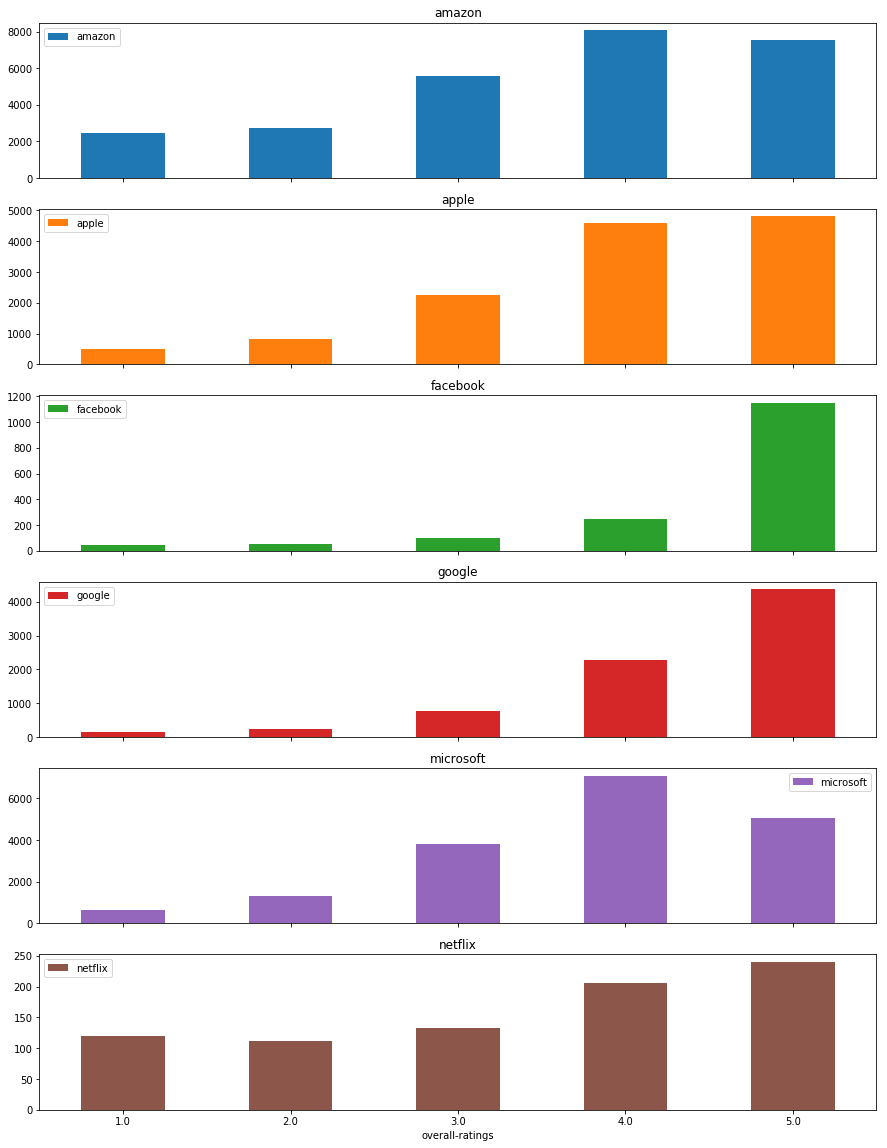

In [20]:
#Show overall rating of company - 5 star scale
df.groupby(['overall-ratings','company']).size().unstack().plot.bar(
    subplots=True, rot=0, figsize=(15,20), legend=True)


In [71]:
companies = ['amazon', 'apple', 'facebook', 'google', 'microsoft', 'netflix']

In [79]:
def score_fetcher(company,attribute):
    pos_count = 0
    neg_count = 0
    final_score = 0
    
    company_rows = df[df['company'].str.contains(str(company))]
    #print(company_rows)
    
    pros = company_rows[company_rows['pros'].str.contains(str(attribute))]
    #print(pros)
    for index, row in pros.iterrows():
        if row['helpful-count'] == 0:
            pos_count += .5
        elif row['helpful-count'] < 51 and row['helpful-count'] > 0:
            pos_count += .75
        elif row['helpful-count'] > 50:
            pos_count += 1
        else:
            print("error value")
    cons = company_rows[company_rows['cons'].str.contains(str(attribute))]
    #print(cons)
    for index, row in cons.iterrows():
        if row['helpful-count'] == 0:
            neg_count += -.5
        elif row['helpful-count'] < 51 and row['helpful-count'] > 0:
            neg_count += -.75
        elif row['helpful-count'] > 50:
            neg_count += -1
        else:
            print("error value")
    final_score = pos_count + neg_count
    return final_score

In [80]:
People_score = score_fetcher("netflix","People")
print(People_score)

-13.0


In [155]:
def Sort(sub_li): 
  
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of  
    # sublist lambda has been used 
    sub_li.sort(key = lambda x: x[1],reverse = True) 
    return sub_li 

In [164]:
def ranker(list_of_attributes):
    am = 0 #amazon
    ap = 0 #apple
    fb = 0 #facebook
    go = 0 #google
    ms = 0 #microsoft
    nf = 0 #netflix
    
    #number of total rows per company
    #amazon       26430
    #apple        12950
    #facebook      1590
    #google        7819
    #microsoft    17930
    #netflix        810

    for a in list_of_attributes:
        #print(a)
        for i in companies:
            if i == 'amazon':
                am += score_fetcher(i,a)
                #print("     ",i,score_fetcher(i,a))
            elif i == 'apple':
                ap += score_fetcher(i,a)
                #print("     ",i,score_fetcher(i,a))
            elif i == 'facebook':
                fb += score_fetcher(i,a)
                #print("     ",i,score_fetcher(i,a))
            elif i == 'google':
                go += score_fetcher(i,a)
                #print("     ",i,score_fetcher(i,a))
            elif i == 'microsoft':
                ms += score_fetcher(i,a)
                #print("     ",i,score_fetcher(i,a))
            elif i == 'netflix':
                nf += score_fetcher(i,a)
                #print("     ",i,score_fetcher(i,a))
            else:
                print('error')

    print("Before row count adjusment:")
    print("     Amazon",am)
    print("     Apple",ap)
    print("     Facebook",fb)
    print("     Google",go)
    print("     Microsoft",ms)
    print("     Netflix",nf)
   
    final_scores = []
    final_scores.append(["am",am/26430])
    final_scores.append(["ap",ap/12950])
    final_scores.append(["fb",fb/590])
    final_scores.append(["go",go/7819])
    final_scores.append(["ms",ms/17930])
    final_scores.append(["nf",nf/810])
    
    print("After row count adjusment:")
    final_scores = Sort(final_scores)
    print(final_scores)

    final_ranks = []
    for b in final_scores:
        final_ranks.append(b[0])
    
    return final_ranks

In [165]:
weather = ['sunny','Sunny','rainy','Rainy','cloudy','Cloudy','Weather','weather',
           'Temperature','temperature','Wind','wind','Windy','windy','Cold','cold','Hot','hot']
ranker(weather)

Before row count adjusment:
     Amazon -190.25
     Apple -34.0
     Facebook -2.25
     Google -5.0
     Microsoft -97.25
     Netflix -4.25
After row count adjusment:
[['go', -0.000639467962655071], ['ap', -0.0026254826254826255], ['fb', -0.0038135593220338985], ['nf', -0.005246913580246914], ['ms', -0.005423870607919688], ['am', -0.0071982595535376465]]


['go', 'ap', 'fb', 'nf', 'ms', 'am']